<a href="https://colab.research.google.com/github/sabrinaMKE201073/IV-preparation-for-data-labeler-role/blob/main/IV_for_video_conference_company_(preparation_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing (NLP) techniques**

# **1) POS (PART OF SPEECH) TAGGING**

Part-of-speech tagging involves
- identifying the grammatical parts of speech (e.g., noun, verb, adjective) of each word in a sentence.
- By analyzing the parts of speech, we can identify the roles of words in the context of a sentence
- gain insights into the content type.

In [10]:
#import libraries
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag

In [7]:
#download Punkt tokenizer from NLTK library
nltk.download('punkt')

text = "This is a sentence. This is another sentence. This is the last sentence."

sentences = nltk.sent_tokenize(text)

print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This is a sentence.', 'This is another sentence.', 'This is the last sentence.']


The Punkt tokenizer is a pre-trained tokenizer that can be used to tokenize text into sentences.

see example as above.

In [8]:
#step 2: Load and Process the Transcript
transcript = """
Participant 1: Good morning, everyone! Today, we will discuss the project status.
Participant 2: Sounds good! Let's start with the marketing strategy.
Participant 3: I agree. We need to focus on social media and content marketing.
Participant 1: Exactly. We can assign action items for each team member.
Participant 2: Yes, let's decide on the deadlines for the action items.
Participant 3: I will follow up with the team on their progress.
"""

- `Pos Tagging`: useful first step in many natural language processing (NLP) tasks,
 - such as `sentiment analysis`, `topic modeling`, and `machine translation`.
- It can also be used to get a better understanding of the structure of a sentence.

In [9]:
#step 3: Tokenize and Perform POS Tagging

# Tokenize the transcript into sentences
# means break transcript into individual sentences
sentences = sent_tokenize(transcript)

# Perform POS tagging for each sentence
for sentence in sentences:
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    print(pos_tags)

[('Participant', 'JJ'), ('1', 'CD'), (':', ':'), ('Good', 'JJ'), ('morning', 'NN'), (',', ','), ('everyone', 'NN'), ('!', '.')]
[('Today', 'NN'), (',', ','), ('we', 'PRP'), ('will', 'MD'), ('discuss', 'VB'), ('the', 'DT'), ('project', 'NN'), ('status', 'NN'), ('.', '.')]
[('Participant', 'JJ'), ('2', 'CD'), (':', ':'), ('Sounds', 'NNS'), ('good', 'JJ'), ('!', '.')]
[('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('with', 'IN'), ('the', 'DT'), ('marketing', 'NN'), ('strategy', 'NN'), ('.', '.')]
[('Participant', 'JJ'), ('3', 'CD'), (':', ':'), ('I', 'PRP'), ('agree', 'VBP'), ('.', '.')]
[('We', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('focus', 'VB'), ('on', 'IN'), ('social', 'JJ'), ('media', 'NNS'), ('and', 'CC'), ('content', 'JJ'), ('marketing', 'NN'), ('.', '.')]
[('Participant', 'JJ'), ('1', 'CD'), (':', ':'), ('Exactly', 'RB'), ('.', '.')]
[('We', 'PRP'), ('can', 'MD'), ('assign', 'VB'), ('action', 'NN'), ('items', 'NNS'), ('for', 'IN'), ('each', 'DT'), ('team', 'NN'), ('member', 'NN

- After run the code, you will see the POS tags for `each word in each sentence`.
- The POS tags provide information about the grammatical parts of speech, such as nouns, verbs, adjectives, etc.
- You can use these POS tags to gain insights into the content discussed during the meeting.

- In this output, you can observe the POS tags like 'NNP' (`proper noun`), 'CD' (`cardinal number`), 'JJ' (`adjective`), 'VB' (`verb`), etc.
- Now, we can analyze these tags to extract specific types of content from the transcript such as:
  - decisions (verbs)
  - action items (nouns).

# BELOW is the example of real world coding that use POS Tagging

In [11]:
import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag

nltk.download('averaged_perceptron_tagger')

def label_content_with_pos(transcript_file_path):
    # (same code as before...)

    labeled_content = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        pos_tags = pos_tag(words)

        # Identify content type based on POS tags
        label = None
        for word, pos in pos_tags:
            if pos.startswith('VB'):  # Verbs (VB, VBD, VBG, VBN, VBP, VBZ)
                label = 'action_item'
                break
            elif 'decide' in word.lower():
                label = 'decision'
                break
            elif 'discuss' in word.lower():
                label = 'discussion'
                break
            elif 'conclude' in word.lower():
                label = 'conclusion'
                break

        labeled_content.append((sentence, label))

    return labeled_content

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# **2) Named Entity Recognition (NER)**

NER is used
- to `identify and classify named entities` in a sentence, such as `names of persons, organizations, locations, dates`, etc.
- In the context of video transcripts, NER can help identify specific entities/peoples that may correspond to action items, decisions, or other content types.



Here's a `simple case study for Named Entity Recognition (NER)` using Python and the `spaCy` library.
- In this case study, we will use spaCy to analyze a video meeting transcript and identify named entities such as names of persons, organizations, and locations.

Here, we load the English language model (`en_core_web_sm`) provided by spaCy.
  - This model contains pre-trained word vectors and linguistic annotations that `allow spaCy to process English text`.
  


In [12]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

def extract_named_entities(transcript):
    doc = nlp(transcript)
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]
    return named_entities

# Sample video meeting transcript
transcript = """
Today's video meeting involved participants from Google, Microsoft, and Apple.
John Smith and Mary Johnson represented Google, while James Lee attended from Microsoft.
They discussed the new product launch in San Francisco next month.
"""

# Extract named entities from the transcript
named_entities = extract_named_entities(transcript)

# Display the named entities
print("Named Entities:")
for entity, label in named_entities:
    print(f"{entity} - {label}")

Named Entities:
Today - DATE
Google - ORG
Microsoft - ORG
Apple - ORG
John Smith - PERSON
Mary Johnson - PERSON
Google - ORG
James Lee - PERSON
Microsoft - ORG
San Francisco - GPE
next month - DATE


In this example,
- spaCy has successfully recognized and labeled named entities such as dates (DATE), organizations (ORG), persons (PERSON), and geographical locations (GPE) from the video meeting transcript.


# **3) SENTIMENT ANALYSIS**

- Sentiment analysis determines the sentiment expressed in a text, such as positive, negative, or neutral.
- While not directly related to content labeling, sentiment analysis can provide additional insights into the overall tone of the video transcript.
- For example, positive sentiments might indicate successful conclusions or decisions, while negative sentiments might reveal unresolved issues or concerns.

In below case study, we'll use Python and the nltk library for sentiment analysis.
- NLTK provides a pre-trained sentiment analysis model called VADER (Valence Aware Dictionary and sEntiment Reasoner), which is useful for analyzing social media text and short sentences.

---


video_meeting_1.txt:
- Meeting started. Team members introduced themselves. Positive vibes in the discussion.
The team decided on the project timeline. Some concerns raised about resource allocation.
Action items assigned to team members. Conclusion: The meeting was productive.

---

video_meeting_2.txt:
- Participants joined the meeting. Technical issues with the audio at the beginning.
The team discussed the project progress. Positive feedback received from the client.
Decisions made regarding the budget. Meeting ended on a positive note.


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon (only need to do this once)
nltk.download('vader_lexicon')

In [16]:
def load_transcript(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()

def analyze_sentiment(transcripts):
    sid = SentimentIntensityAnalyzer()
    overall_sentiment_scores = []

    for transcript in transcripts:
        sentiment_scores = [sid.polarity_scores(sentence)["compound"] for sentence in transcript]
        overall_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
        overall_sentiment_scores.append(overall_sentiment_score)

    return overall_sentiment_scores

def main():
    # Load transcripts
    video_meeting_1 = load_transcript("video_meeting_1.txt")
    video_meeting_2 = load_transcript("video_meeting_2.txt")

    # Analyze sentiment
    overall_sentiment_scores = analyze_sentiment([video_meeting_1, video_meeting_2])

    # Display results
    for i, score in enumerate(overall_sentiment_scores, 1):
        print(f"Video Meeting {i}: Overall Sentiment Score = {score:.2f}")

if __name__ == "__main__":
    main()

Video Meeting 1: Overall Sentiment Score = 0.56
Video Meeting 2: Overall Sentiment Score = 0.88


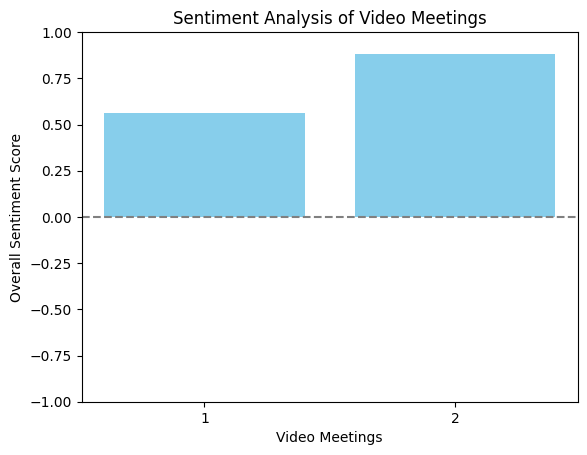

In [17]:
#Data Visualization
import matplotlib.pyplot as plt

def visualize_sentiment(scores):
    meetings = range(1, len(scores) + 1)
    plt.bar(meetings, scores, color='skyblue')
    plt.xlabel('Video Meetings')
    plt.ylabel('Overall Sentiment Score')
    plt.title('Sentiment Analysis of Video Meetings')
    plt.xticks(meetings)
    plt.ylim(-1, 1)
    plt.axhline(0, color='gray', linestyle='dashed')
    plt.show()

if __name__ == "__main__":
    # Sample sentiment scores (replace this with your actual sentiment scores)
    overall_sentiment_scores = [0.56, 0.88]

    # Visualize sentiment
    visualize_sentiment(overall_sentiment_scores)

- The overall sentiment scores are between -1 and 1, where -1 represents a negative sentiment, 0 is neutral, and 1 is a positive sentiment.
- In this case, both video meetings have positive overall sentiments, with `Meeting 2 being slightly more positive than Meeting 1`.